# SVD pipeline
Goal: Define a pipeline that takes as input a grayscale image and performs lower rank approximation.   
*Reminder*: Any matrix A can be decomposed by doing $A=U \Sigma V^T $   
A lower rank approximation (rank-k approximation) of A is given by $A_k$ = $\sum_{i=1}^{k} \sigma_iu_iv_i^T$

In [26]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import math


In [27]:
def read_image(path):
    # load image as grayscale
    img = Image.open(path).convert("L")
    # load it as numpy array
    img = np.array(img)
    # make sure it is 2D
    assert (img.ndim == 2)
    return img


In [28]:
def show_image(img: np.array):
    plt.imshow(img, cmap='gray')
    plt.title("Original image")
    plt.show()


In [29]:
# count how many singular values you need to retain a given amount of variance
def count(variance, variance_threshold):
    total_variance = 0
    count = 0
    for el in variance:
        total_variance += el
        count += 1
        if total_variance >= variance_threshold:
            return count
    

### Lower rank approximation via SVD
A rank-k approximation is given by $A_k =U_k \Sigma_k V^T_k $   
- $U_k$: first $k$ columns of $U$
- $\Sigma_k$: diagonal matrix of top $k$ singular values
- $V_k$: first $k$ columns of $V$ (or first $k$ rows of $V^T$)

####  Why Take the First k Columns of U?

Each column $u_i$ of $U$ is a **left singular vector** and contributes to a **rank-1 matrix**:

$$
A_k = \sum_{i=1}^{k} \sigma_i u_i v_i^T
$$

To build the rank-$k$ approximation:

- Take the **first $k$ columns of $U$**  shape $(m \times k)$  
- The **first $k$ singular values** $\sigma_1, \dots, \sigma_k$  
- The **first $k$ rows of $V^T$** (i.e., $v_1^T, \dots, v_k^T$)

In [30]:
# plotting functions

# plot only the k singular values of the k rank approx
def plot_k_singular_values(sigma, k):
    variance = [el/sum(sigma) for el in sigma]
    plt.stem(range(k), variance[:k])
    plt.title(f"Variance explained by first {k} singular values")
    plt.xlabel("Singular value index")
    plt.ylabel("Variance explained")
    plt.show()

# plot all singular values (dense plot)
def plot_singular_values(sigma):
    variance = [el/sum(sigma) for el in sigma]
    plt.stem(range(len(variance)), variance)
    plt.title("Variance explained by singular values")
    plt.xlabel("Singular value index")
    plt.ylabel("Variance explained")
    plt.show()

In [31]:
# plot intermediate reconstruction steps for visualization
def plot_reconstruction(U, sigma, Vt, variance_retained):

    counter = 0
    images = []

    # decide to stop if final amount of retained variance is reached 
    variance = [el/sum(sigma) for el in sigma]
    c = count(variance, variance_retained)

    target_reconstructions = 20
    step = max(1, c // target_reconstructions) 

    # delete this if you want to keep above logic
    # step = 24
    for k in range(1,c, step):

    # do some k-rank approximation 
        counter += 1
        img_rec = U[:,:k] @ np.diag(sigma[:k]) @ Vt[:k, :]
        # append both the image and the number of singular values
        images.append((img_rec, k))

    cols = 3
    rows = math.ceil(counter / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()

    for i in range(counter):
        axes[i].imshow(images[i][0], cmap='gray')
        axes[i].set_title(f"Reconstruction using {images[i][1]} singular values", fontsize=8)
    
    plt.tight_layout()
    plt.show()

# reconstruct an image retaining only a given amount of variance
def reconstruct(img, variance_retained=0.9):
    U, sigma, Vt = np.linalg.svd(img)
    # calculate variance explained by each singular value
    variance = [el/sum(sigma) for el in sigma]
    # find how many singular values we need to retain a variance of 90 percent
    k = count(variance, variance_retained)
    plot_k_singular_values(sigma, k)
    # reconstruct k-rank matrix 
    img_rec = U[:,:k] @ np.diag(sigma[:k]) @ Vt[:k, :]
    # plot reconstructed image
    plt.imshow(img_rec, cmap='gray')
    plt.title(f"Reconstruced image using first {k} singular values")
    plt.show()
    # plot reconstruction data
    plot_reconstruction(U, sigma, Vt, variance_retained)
    
    

In [ ]:
# function that gets it all together

def svd(image_path, variance_retained):
    img = read_image(image_path)
    show_image(img)
    reconstruct(img, variance_retained)


# Result
To reconstruct an image by approximating it with a lower rank matrix change the variables below and have fun with it!

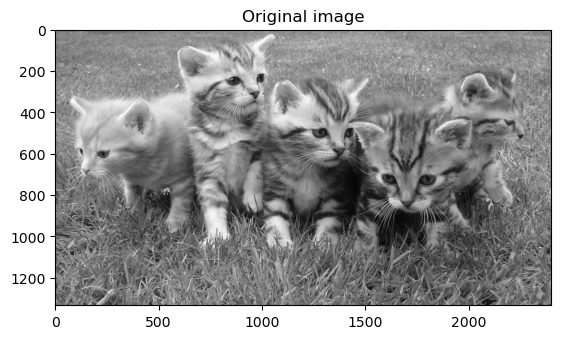

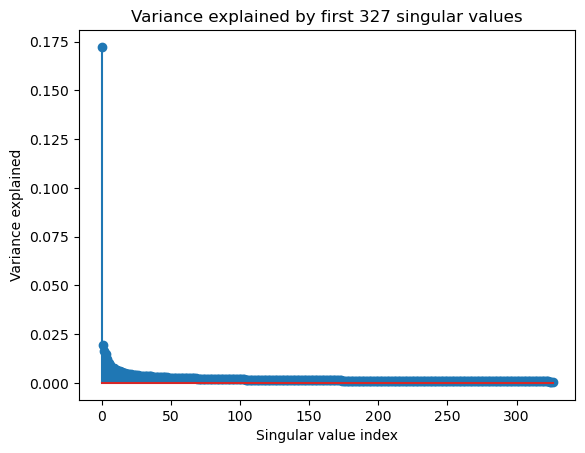

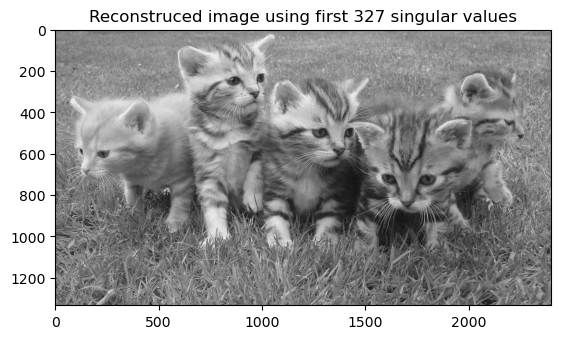

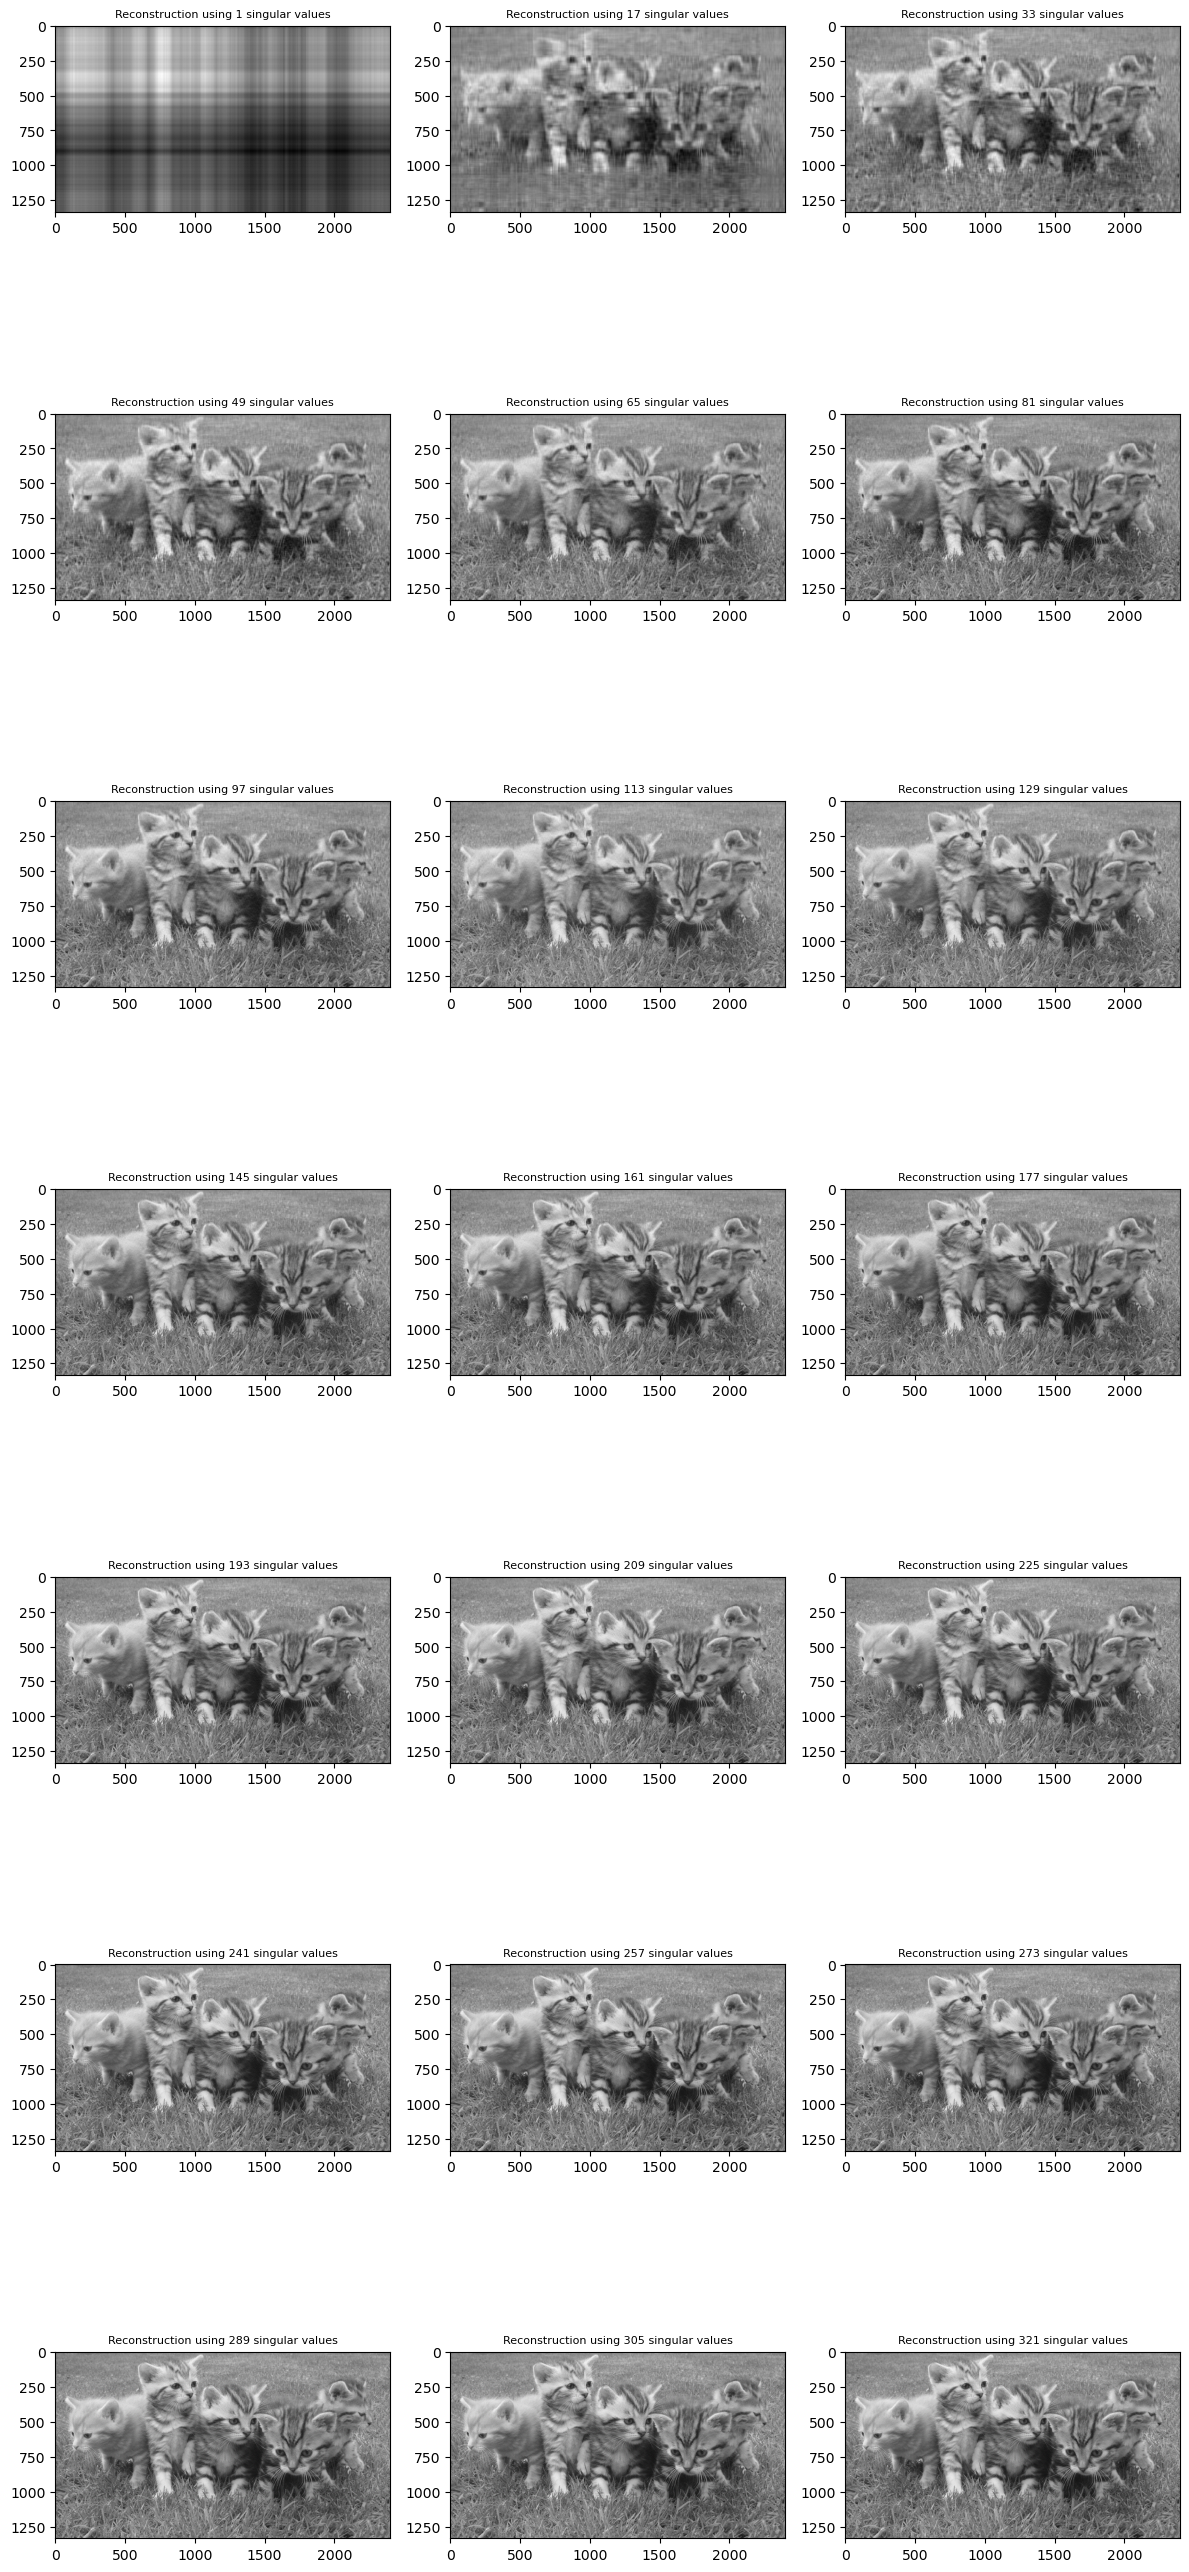

In [34]:
# set desired path to image
image_path = "figures/cat.jpg"
# set amount of variance you want to reconstruct
variance_retained = 0.8

# magic time!
svd(image_path, variance_retained)
